In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv(r'C:\Users\User\Downloads\555089_1357151_compressed_us_counties_covid19_daily.csv\us_counties_covid19_daily.csv')

In [4]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353568 entries, 0 to 353567
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    353568 non-null  object 
 1   county  353568 non-null  object 
 2   state   353568 non-null  object 
 3   fips    349985 non-null  float64
 4   cases   353568 non-null  int64  
 5   deaths  353568 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.isnull().sum()

date         0
county       0
state        0
fips      3583
cases        0
deaths       0
dtype: int64

In [7]:
df.dropna(axis=0)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
353563,2020-07-20,Sweetwater,Wyoming,56037.0,181,2
353564,2020-07-20,Teton,Wyoming,56039.0,223,1
353565,2020-07-20,Uinta,Wyoming,56041.0,222,0
353566,2020-07-20,Washakie,Wyoming,56043.0,43,5


In [13]:
df['date']=pd.to_datetime(df['date'])

In [14]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [15]:
df['month']=df['date'].apply(lambda x :  x.month)
df['weekday']=df['date'].apply(lambda x : x.weekday())

In [16]:
df.head()

,date,county,state,fips,cases,deaths,month,weekday
0,2020-01-21,Snohomish,Washington,53061.0,1,0,1,1
1,2020-01-22,Snohomish,Washington,53061.0,1,0,1,2
2,2020-01-23,Snohomish,Washington,53061.0,1,0,1,3
3,2020-01-24,Cook,Illinois,17031.0,1,0,1,4
4,2020-01-24,Snohomish,Washington,53061.0,1,0,1,4


In [17]:
dict={0:"monday",1:'tuesday',2:"wednesday",3:'thrusday',4:'friday',5:'saturday',6:'sunday'}

In [18]:
df['weekday']=df['weekday'].map(dict)

In [19]:
df.head()

,date,county,state,fips,cases,deaths,month,weekday
0,2020-01-21,Snohomish,Washington,53061.0,1,0,1,tuesday
1,2020-01-22,Snohomish,Washington,53061.0,1,0,1,wednesday
2,2020-01-23,Snohomish,Washington,53061.0,1,0,1,thrusday
3,2020-01-24,Cook,Illinois,17031.0,1,0,1,friday
4,2020-01-24,Snohomish,Washington,53061.0,1,0,1,friday


In [20]:
df.groupby('state').sum()['cases'].iplot()

In [43]:
df.groupby('weekday')['cases'].sum().iplot(kind='bar')

In [26]:
a=df.corr()

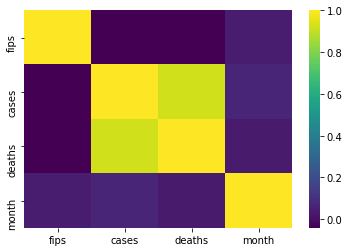

In [27]:
sns.heatmap(a,cmap='viridis')

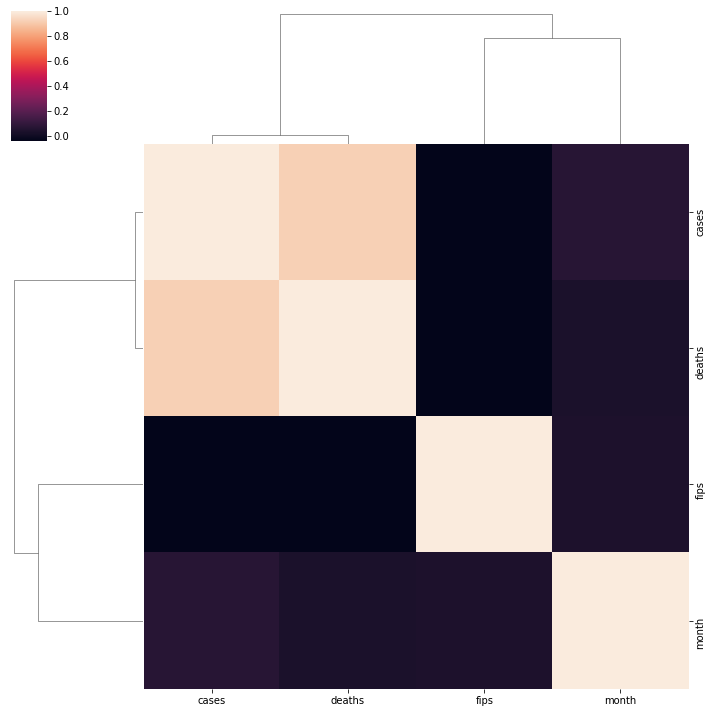

In [28]:
sns.clustermap(a)

In [29]:
df.groupby('date').sum()['cases'].iplot()

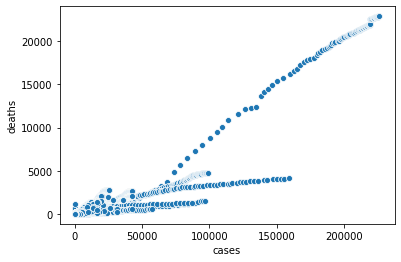

In [34]:
sns.scatterplot(df['cases'],df['deaths'])
#plt.tight_layout(pad=-20)

In [82]:
df.head()

,date,county,state,fips,cases,deaths,month,weekday
0,2020-01-21,Snohomish,Washington,53061.0,1,0,1,tuesday
1,2020-01-22,Snohomish,Washington,53061.0,1,0,1,wednesday
2,2020-01-23,Snohomish,Washington,53061.0,1,0,1,thrusday
3,2020-01-24,Cook,Illinois,17031.0,1,0,1,friday
4,2020-01-24,Snohomish,Washington,53061.0,1,0,1,friday


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

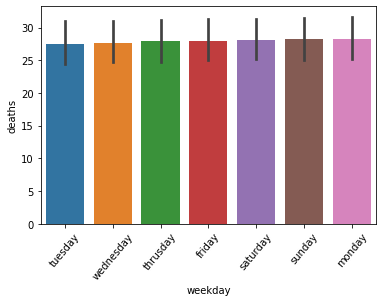

In [94]:
sns.barplot(df.weekday,df.deaths)
plt.xticks(rotation=50)

In [50]:
df.groupby(['weekday','month']).sum()['deaths'].unstack().iplot(kind='surface')